In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [2]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','S000501']]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [5]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [8]:
corr=data[numerical_cols].corr()
corr=corr.S000501_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,S000501_y,1.000000
134,L393800,1.000000
119,L303204,0.990557
71,L122000,0.973488
118,L303203,0.826475


In [9]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [10]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,S000501_y,1.000000,159312
9,S000501_x,0.662426,159305
11,S000502,0.569362,159305
18,S000300,0.438297,159075
21,SEX,0.377214,159381
26,L190400,0.347259,159241
27,L190300,0.346502,159204
29,L190500,0.340511,159204
30,L100700,0.338455,152474
35,L103300,0.285325,135222


In [11]:
print(list(mergedColCorrCount.head(18).Col))

['S000501_y', 'S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max']


Anova test - For categorical values [Questionnaire answers]
=======

In [12]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [13]:
colslist=mydataset.columns
DiabeticColVals=data.S000501_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [14]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [15]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,1721.106498,0.000000e+00,158999
28,FIELD_38,826.217613,0.000000e+00,159007
29,FIELD_40,333.334463,0.000000e+00,159013
19,FIELD_29,202.381382,6.735109e-46,159294
30,FIELD_41,188.553755,1.246244e-279,158983
17,FIELD_27,145.168321,2.040395e-33,159294
31,FIELD_42,36.459465,2.763950e-58,158962
2,FIELD_5,16.543763,3.699292e-19,66859
8,FIELD_18,12.947484,3.204488e-04,159294
15,FIELD_25,11.221877,8.085744e-04,159295


In [16]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 'FIELD_18', 'FIELD_25']


========================= LASSO method
================

In [17]:
selectedcols=['S000501_y', 'S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(19651, 28)


In [19]:
x=data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
        ]]
y=data2.S000501_y

In [20]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 5.08563368e-01  2.04164818e-01  4.47294105e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  7.74340951e-02
  5.78352745e-02 -0.00000000e+00 -1.20038124e-02  4.65084474e-02
  2.99787732e-03  7.67769517e-03  5.86093096e-03 -1.64631472e-04
  9.49324077e-01 -0.00000000e+00 -0.00000000e+00  6.15116169e-02
  4.80044766e-02  1.44687266e-01  0.00000000e+00  6.32697015e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
26.90602366034591


,Name,coeff
16,max,0.949324
0,S000501_x,0.508563
2,S000300,0.447294
1,S000502,0.204165
21,FIELD_41,0.144687
7,L100700,0.077434
19,FIELD_40,0.061512
8,L103300,0.057835
20,FIELD_29,0.048004
11,L100800,0.046508


In [21]:
print(list(lassod.Name[:20]))

['max', 'S000501_x', 'S000300', 'S000502', 'FIELD_41', 'L100700', 'FIELD_40', 'L103300', 'FIELD_29', 'L100800', 'S000100', 'L101700', 'FIELD_42', 'L101300', 'L103000', 'L103100']


=============================== SelectKBest method
========================

In [22]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100']


========================================= LinearSVC
===============

In [23]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [24]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [25]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.32289565 0.16366113 0.0482368  0.         0.02305023 0.0263711
 0.02233515 0.0270437  0.02599405 0.0228611  0.028741   0.02885326
 0.02498469 0.02442635 0.02325312 0.02655375 0.01674605 0.00869007
 0.01927231 0.02071254 0.01173827 0.02259444 0.00758177 0.02461327
 0.02011518 0.00469434 0.00398068]


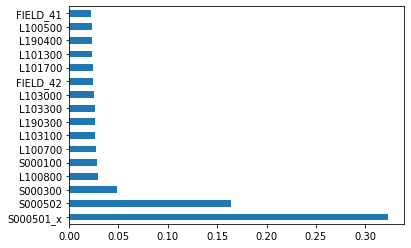

Index(['S000501_x', 'S000502', 'S000300', 'L100800', 'S000100', 'L100700',
       'L103100', 'L190300', 'L103300', 'L103000', 'FIELD_42', 'L101700',
       'L101300', 'L190400', 'L100500', 'FIELD_41'],
      dtype='object')


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [27]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              S000501_y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     676.3
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:04:49   Log-Likelihood:                -70752.
No. Observations:               19651   AIC:                         1.416e+05
Df Residuals:                   19624   BIC:                         1.418e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S000501_x      0.4981      0.008     60.859      0.000       0.482       0.514
S000502        0.2033      0.011     17.941      0.000       0.181       0.225
S000300        0.4408      0.024     18.681      0.000       0.395       0.487
SEX           11.3091      1.232      9.183      0.000       8.895      13.723
L190400       -0.4397      0.168     -2.625      0.009      -0.768      -0.111
L190300        1.5364      0.319      4.809      0.000       0.910       2.163
L190500        0.0420      0.075      0.557      0.577      -0.106       0.190
L100700        0.2096      0.081      2.587      0.010       0.051       0.368
L103300        0.2713      0.129      2.107      0.035       0.019       0.524
L100500       -0.7682      0.528     -1.456      0.146      -1.803       0.266
S000100       -0.0005      0.012     -0.041      0.967      -0.025       0.024
L100800        0.0446      0.008      5.884      0.000       0.030       0.060
L103000        0.0007      0.002      0.437      0.662      -0.003       0.004
L101700        0.0081      0.004      1.967      0.049    2.74e-05       0.016
L101300        0.0032      0.005      0.653      0.514      -0.006       0.013
L103100        0.0083      0.007      1.172      0.241      -0.006       0.022
max            1.8416      0.187      9.858      0.000       1.475       2.208
FIELD_33      -0.5881      0.194     -3.025      0.002      -0.969      -0.207
FIELD_38       0.0335      0.071      0.472      0.637      -0.106       0.173
FIELD_40       0.0992      0.055      1.812      0.070      -0.008       0.206
FIELD_29       0.7872      0.169      4.645      0.000       0.455       1.119
FIELD_41       0.1491      0.051      2.919      0.004       0.049       0.249
FIELD_27       0.1397      0.282      0.495      0.621      -0.413       0.693
FIELD_42       0.0250      0.031      0.807      0.420      -0.036       0.086
FIELD_5       -0.1138      0.103     -1.109      0.267      -0.315       0.087
FIELD_18       0.5324      0.528      1.007      0.314      -0.504       1.568
FIELD_25      -0.3533      0.608     -0.581      0.561      -1.545       0.839
const         11.3091      1.232      9.183      0.000       8.895      13.723
==============================================================================
Omnibus:                      630.555   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.884
Skew:                           0.316   Prob(JB):                    2.22e-209
Kurtosis:                       3.879   Cond. No.                     1.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-23. This might indicat

In [28]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [29]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [30]:
print(temp.columns.shape)
temp.columns

(28,)


Index(['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300',
       'L190500', 'L100700', 'L103300', 'L100500', 'S000100', 'L100800',
       'L103000', 'L101700', 'L101300', 'L103100', 'max', 'FIELD_33',
       'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42',
       'FIELD_5', 'FIELD_18', 'FIELD_25', 'const'],
      dtype='object')

================== Check Variance inflation factor and multi collinearity
==================== 

,S000501_x,S000502,S000300,SEX,L190400,L190300,L190500,L100700,L103300,L100500,...,FIELD_38,FIELD_40,FIELD_29,FIELD_41,FIELD_27,FIELD_42,FIELD_5,FIELD_18,FIELD_25,y
S000501_x,1.000000,0.737095,0.339675,NaN,0.097478,0.166094,0.112913,0.126039,0.205514,0.032333,...,0.006382,0.058500,0.067804,0.056078,0.051659,0.016813,-0.037148,0.030647,0.032592,0.661876
S000502,0.737095,1.000000,0.262408,NaN,0.114570,0.160767,0.118810,0.137715,0.160258,0.032297,...,0.038580,0.032141,0.074252,0.034529,0.050644,0.007200,-0.035382,0.028027,0.025378,0.554545
S000300,0.339675,0.262408,1.000000,NaN,0.048471,0.098118,0.037529,0.222138,0.370719,0.041657,...,-0.017668,0.070801,0.034960,0.049089,0.047150,-0.014725,-0.023114,0.012916,0.010549,0.346702
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L190400,0.097478,0.114570,0.048471,NaN,1.000000,0.571044,0.929783,0.205794,0.059402,0.122319,...,0.057205,0.012037,-0.003245,-0.005845,0.002815,0.003319,-0.003699,-0.019978,-0.027352,0.074981
L190300,0.166094,0.160767,0.098118,NaN,0.571044,1.000000,0.706324,0.183194,0.128504,0.111906,...,-0.030086,-0.026499,0.009482,-0.039114,-0.002755,-0.023599,0.001316,-0.018720,-0.018363,0.145480
L190500,0.112913,0.118810,0.037529,NaN,0.929783,0.706324,1.000000,0.192095,0.050199,0.129309,...,0.056322,0.016004,0.003575,-0.006289,-0.001366,0.003355,-0.005220,-0.024050,-0.030379,0.088978
L100700,0.126039,0.137715,0.222138,NaN,0.205794,0.183194,0.192095,1.000000,0.185909,0.210864,...,0.076331,0.039203,0.013971,0.023520,0.002923,0.011150,-0.021280,-0.012572,-0.010855,0.133598
L103300,0.205514,0.160258,0.370719,NaN,0.059402,0.128504,0.050199,0.185909,1.000000,0.015288,...,-0.164269,-0.008927,0.000256,0.003492,0.037501,-0.034507,-0.030038,0.017027,0.016482,0.206443
L100500,0.032333,0.032297,0.041657,NaN,0.122319,0.111906,0.129309,0.210864,0.015288,1.000000,...,-0.005776,0.067088,0.006567,0.055231,0.015943,0.018423,-0.012451,0.002663,0.006006,0.028450


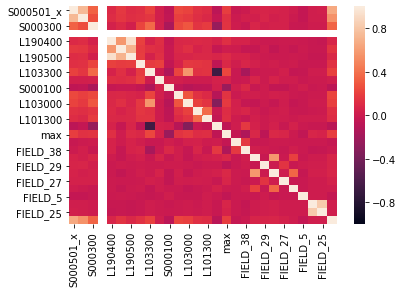

In [34]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

In [35]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

0 ,  S000501_x  VIF =  2.39
1 ,  S000502  VIF =  2.23
2 ,  S000300  VIF =  1.36
3 ,  SEX  VIF =  0.0
4 ,  L190400  VIF =  8.51
5 ,  L190300  VIF =  2.41
6 ,  L190500  VIF =  11.53
7 ,  L100700  VIF =  1.19
8 ,  L103300  VIF =  2.68
9 ,  L100500  VIF =  1.07
10 ,  S000100  VIF =  1.09
11 ,  L100800  VIF =  1.17
12 ,  L103000  VIF =  1.59
13 ,  L101700  VIF =  1.25
14 ,  L101300  VIF =  1.21
15 ,  L103100  VIF =  1.96
16 ,  max  VIF =  1.22
17 ,  FIELD_33  VIF =  1.04
18 ,  FIELD_38  VIF =  1.13
19 ,  FIELD_40  VIF =  1.51
20 ,  FIELD_29  VIF =  1.04
21 ,  FIELD_41  VIF =  1.66
22 ,  FIELD_27  VIF =  1.03
23 ,  FIELD_42  VIF =  1.15
24 ,  FIELD_5  VIF =  1.01
25 ,  FIELD_18  VIF =  3.07
26 ,  FIELD_25  VIF =  3.07


In [36]:
print(newcols,len(newcols))

['S000501_x', 'S000502', 'S000300', 'SEX', 'L190300', 'L100700', 'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 'FIELD_18', 'FIELD_25'] 25
